<a href="https://colab.research.google.com/github/CodesbyUnnati/Surprise/blob/main/DATA_PREPROCESSING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#import libraries
import pandas as pd
import numpy as np 
import datetime

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold

In [11]:
#read file and print the number of count of rows and columns(19)
df = pd.read_csv(r'/content/H2HBABBA3103.csv')
df.shape


(50000, 19)

In [12]:
# df. head() Returns the first 5 rows of the dataframe.
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200726979,BJ'S corp,2019-02-07 00:00:00,2019.0,1.928678e+09,2019-01-23,20190124,20190123,20190207.0,USD,RV,1.0,NaN,304.42,20190123.0,NAA8,1.928678e+09,0
1,U001,0200792734,MDV/ llc,2019-11-04 00:00:00,2019.0,1.930042e+09,2019-10-22,20191022,20191022,20191106.0,USD,RV,1.0,NaN,551.05,20191022.0,NAA8,1.930042e+09,0
2,U001,0100031704,DELHAIZE,NaN,2020.0,1.930779e+09,2020-04-13,20200411,20200413,20200428.0,USD,RV,1.0,NaN,41309.35,20200413.0,NAA8,1.930779e+09,1
3,U001,0200726979,BJ'S corporation,2019-09-03 00:00:00,2019.0,1.929759e+09,2019-08-18,20190817,20190818,20190902.0,USD,RV,1.0,NaN,782.52,20190818.0,NAA8,1.929759e+09,0
4,U001,0200984655,PERFOR in,NaN,2020.0,1.930653e+09,2020-03-19,20200314,20200319,20200420.0,USD,RV,1.0,NaN,14666.40,20200319.0,NA32,1.930653e+09,1


In [13]:
# The info() function is used to print a concise summary of a DataFrame. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

In [14]:
# duplicated data
df[df.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
1700,U001,0200769623,WAL-MAR llc,2019-10-09 00:00:00,2019.0,1.929937e+09,2019-09-28,20190927,20190928,20191013.0,USD,RV,1.0,NaN,40564.06,20190928.0,NAH4,1.929937e+09,0
1829,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930809e+09,2020-04-22,20200421,20200422,20200507.0,USD,RV,1.0,NaN,1329.23,20200422.0,NAH4,1.930809e+09,1
1883,U001,0200769623,WAL-MAR associates,2019-10-29 00:00:00,2019.0,1.930023e+09,2019-10-18,20191017,20191018,20191102.0,USD,RV,1.0,NaN,935.53,20191018.0,NAH4,1.930023e+09,0
2958,U001,0200707822,PUBLI us,2019-02-26 00:00:00,2019.0,1.928778e+09,2019-02-11,20190211,20190211,20190226.0,USD,RV,1.0,NaN,20456.42,20190211.0,NAA8,1.928778e+09,0
3044,U001,0200769623,WAL-MAR corporation,NaN,2020.0,1.930788e+09,2020-04-14,20200415,20200414,20200429.0,USD,RV,1.0,NaN,56202.58,20200414.0,NAH4,1.930788e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49797,U001,0200769623,WAL-MAR llc,NaN,2020.0,1.930852e+09,2020-05-03,20200502,20200503,20200518.0,USD,RV,1.0,NaN,17477.66,20200503.0,NAH4,1.930852e+09,1
49853,U001,0200793568,SUPE trust,2019-05-10 00:00:00,2019.0,1.929193e+09,2019-04-25,20190423,20190425,20190510.0,USD,RV,1.0,NaN,2988.50,20190425.0,NAA8,1.929193e+09,0
49934,U001,0200744019,TARG corp,2019-08-01 00:00:00,2019.0,1.929620e+09,2019-07-16,20190715,20190716,20190731.0,USD,RV,1.0,NaN,14682.08,20190716.0,NAA8,1.929620e+09,0
49939,U001,0200726979,BJ'S foundation,2019-04-16 00:00:00,2019.0,1.929062e+09,2019-04-01,20190331,20190401,20190416.0,USD,RV,1.0,NaN,171.92,20190401.0,NAA8,1.929062e+09,0


In [15]:
df['clear_date']=pd.to_datetime(df['clear_date'])

In [32]:
df['delay_calculated']=df['clear_date']-df['due_in_date']
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay_calculated
0,CA02,0140106181,THE corp,2019-05-01,2019.0,2.960520e+09,2018-12-30,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190110,CAD,RV,1.0,117723.35,1970-01-01 00:00:00.020181231,CA10,2.960520e+09,0,18016 days 23:59:59.979809890
1,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190114,USD,RV,1.0,14101.89,1970-01-01 00:00:00.020181230,NAH4,1.928541e+09,0,17904 days 23:59:59.979809886
2,CA02,0140106408,WAL-M in,2019-01-25,2019.0,2.960520e+09,2018-12-30,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190109,CAD,RV,1.0,2023.32,1970-01-01 00:00:00.020181230,CA10,2.960520e+09,0,17920 days 23:59:59.979809891
3,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190114,USD,RV,1.0,15898.07,1970-01-01 00:00:00.020181230,NAH4,1.928533e+09,0,17904 days 23:59:59.979809886
4,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190114,USD,RV,1.0,14101.89,1970-01-01 00:00:00.020181230,NAH4,1.928541e+09,0,17904 days 23:59:59.979809886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,1970-01-01 00:00:00.020200518,1970-01-01 00:00:00.020200602,USD,RV,1.0,16099.20,1970-01-01 00:00:00.020200518,NAA8,1.930915e+09,1,NaT
49996,U001,200875680,MINERS,NaT,2020.0,1.930911e+09,2020-05-18,1970-01-01 00:00:00.020200518,1970-01-01 00:00:00.020200602,USD,RV,1.0,119248.83,1970-01-01 00:00:00.020200518,NAA8,1.930911e+09,1,NaT
49997,U001,0200464724,LAND,NaT,2020.0,1.930914e+09,2020-05-19,1970-01-01 00:00:00.020200519,1970-01-01 00:00:00.020200529,USD,RV,1.0,194864.00,1970-01-01 00:00:00.020200519,NA10,1.930914e+09,1,NaT
49998,U001,0200756072,REINHA llc,NaT,2020.0,1.930927e+09,2020-05-21,1970-01-01 00:00:00.020200521,1970-01-01 00:00:00.020200620,USD,RV,1.0,2.50,1970-01-01 00:00:00.020200521,NAD5,1.930927e+09,1,NaT


In [18]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date               int64
document_create_date.1             int64
due_in_date                      float64
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [19]:
df['posting_date']=pd.to_datetime(df['posting_date'])

In [20]:
df['document_create_date.1']=pd.to_datetime(df['document_create_date.1'])

In [21]:
df['due_in_date']=pd.to_datetime(df['due_in_date'])

In [22]:
df['baseline_create_date']=pd.to_datetime(df['baseline_create_date'])

In [23]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date               int64
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
area_business                    float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [24]:
# sort as per posting date
df.sort_values(['posting_date'],inplace=True)
df.reset_index(inplace=True,drop=True)
df

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,CA02,0140106181,THE corp,2019-05-01,2019.0,2.960520e+09,2018-12-30,20181230,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190110,CAD,RV,1.0,NaN,117723.35,1970-01-01 00:00:00.020181231,CA10,2.960520e+09,0
1,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,20181229,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190114,USD,RV,1.0,NaN,14101.89,1970-01-01 00:00:00.020181230,NAH4,1.928541e+09,0
2,CA02,0140106408,WAL-M in,2019-01-25,2019.0,2.960520e+09,2018-12-30,20181230,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190109,CAD,RV,1.0,NaN,2023.32,1970-01-01 00:00:00.020181230,CA10,2.960520e+09,0
3,U001,0200769623,WAL-MAR us,2019-01-09,2019.0,1.928533e+09,2018-12-30,20181229,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190114,USD,RV,1.0,NaN,15898.07,1970-01-01 00:00:00.020181230,NAH4,1.928533e+09,0
4,U001,0200769623,WAL-MAR associates,2019-01-09,2019.0,1.928541e+09,2018-12-30,20181229,1970-01-01 00:00:00.020181230,1970-01-01 00:00:00.020190114,USD,RV,1.0,NaN,14101.89,1970-01-01 00:00:00.020181230,NAH4,1.928541e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,20200518,1970-01-01 00:00:00.020200518,1970-01-01 00:00:00.020200602,USD,RV,1.0,NaN,16099.20,1970-01-01 00:00:00.020200518,NAA8,1.930915e+09,1
49996,U001,200875680,MINERS,NaT,2020.0,1.930911e+09,2020-05-18,20200516,1970-01-01 00:00:00.020200518,1970-01-01 00:00:00.020200602,USD,RV,1.0,NaN,119248.83,1970-01-01 00:00:00.020200518,NAA8,1.930911e+09,1
49997,U001,0200464724,LAND,NaT,2020.0,1.930914e+09,2020-05-19,20200519,1970-01-01 00:00:00.020200519,1970-01-01 00:00:00.020200529,USD,RV,1.0,NaN,194864.00,1970-01-01 00:00:00.020200519,NA10,1.930914e+09,1
49998,U001,0200756072,REINHA llc,NaT,2020.0,1.930927e+09,2020-05-21,20200521,1970-01-01 00:00:00.020200521,1970-01-01 00:00:00.020200620,USD,RV,1.0,NaN,2.50,1970-01-01 00:00:00.020200521,NAD5,1.930927e+09,1


In [25]:
# dropped  column
df.drop(['document_create_date'],
  axis=1, inplace=True)

In [26]:
# dropped  column
df.drop(['area_business'], axis=1,inplace=True)

In [27]:

df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [28]:
# list out null values
df.clear_date.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
49995     True
49996     True
49997     True
49998     True
49999     True
Name: clear_date, Length: 50000, dtype: bool

In [29]:
#  list out not null values
~df.clear_date.isnull()

0         True
1         True
2         True
3         True
4         True
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: clear_date, Length: 50000, dtype: bool

In [30]:
df.posting_id.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Name: posting_id, Length: 50000, dtype: bool

In [35]:
# to make a separate dataframe where clear date is null
df_null_cd=df.clear_date.isnull()
df_null_cd

0        False
1        False
2        False
3        False
4        False
         ...  
49995     True
49996     True
49997     True
49998     True
49999     True
Name: clear_date, Length: 50000, dtype: bool

   posting_date  clear_date  due_in_date
0      0.203646    0.404656     0.134426
1      0.369195    0.692170     0.066619
2      0.162723    0.928813     0.880312
3      0.645993    0.463440     0.609752
4      0.719682    0.455440     0.379434
5      0.842039    0.302307     0.424737
6      0.150502    0.448847     0.765932
7      0.316247    0.190548     0.012477
8      0.983777    0.976060     0.750676
9      0.329716    0.244732     0.621885


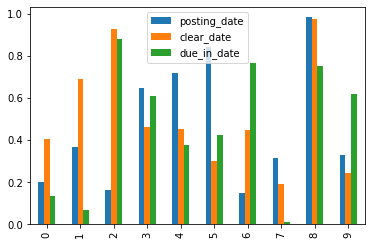

In [ ]:
# bar graph of 3 dates

# importing matplotlib
import matplotlib.pyplot

# creating a dataframe 
df = pd.DataFrame(np.random.rand(10, 3), columns =['posting_date', 'clear_date', 'due_in_date'])
  
print(df)

# using a function df.plot.bar()
df.plot.bar()

In [31]:
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
document type                     object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
invoice_id                       float64
isOpen                             int64
dtype: object

In [ ]:
# correlation
# A positive correlation indicates the extent to which those variables increase
# or decrease in parallel; a negative correlation indicates the extent to which one variable
# increases as the other decreases.
print(df.corr())

                   buisness_year    doc_id  ...  invoice_id    isOpen
buisness_year           1.000000 -0.019292  ...   -0.017969  0.754873
doc_id                 -0.019292  1.000000  ...    1.000000 -0.015280
posting_id                   NaN       NaN  ...         NaN       NaN
total_open_amount       0.001829  0.183193  ...    0.193003  0.010064
invoice_id             -0.017969  1.000000  ...    1.000000 -0.014312
isOpen                  0.754873 -0.015280  ...   -0.014312  1.000000

[6 rows x 6 columns]


In [ ]:
# statistics, covariance is a measure of the joint variability of two random variables. the variables tend to
# show the opposite behavior), the covariance is negative.
df.cov()

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen
buisness_year,2.119558e-01,-2.550766e+06,0.0,3.415947e+01,-2.276971e+06,1.390148e-01
doc_id,-2.550766e+06,8.247474e+16,0.0,2.134592e+12,7.575335e+16,-1.755281e+06
posting_id,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00
total_open_amount,3.415947e+01,2.134592e+12,0.0,1.646225e+09,2.155376e+12,1.633409e+02
invoice_id,-2.276971e+06,7.575335e+16,0.0,2.155376e+12,7.575335e+16,-1.575718e+06
isOpen,1.390148e-01,-1.755281e+06,0.0,1.633409e+02,-1.575718e+06,1.600032e-01


In [ ]:
df['total_open_amount'].mean()

32537.285580799493

In [ ]:
df['total_open_amount'].median()

17425.98

In [ ]:
df['total_open_amount'].mode()

0    1898.2
dtype: float64

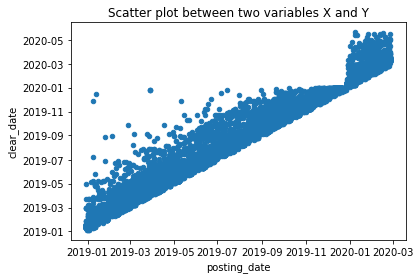

In [ ]:
# SCATTER PLOT TO FIND OUT OUTLIER
df.plot.scatter(x='posting_date', y='clear_date', title= "Scatter plot between two variables X and Y");

plot.show(block=True);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


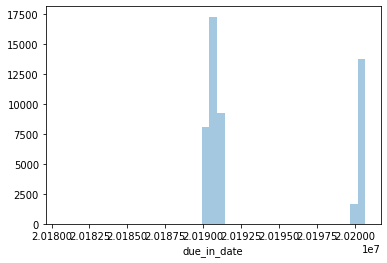

In [ ]:
import seaborn as sns
sns.distplot(df.due_in_date.dropna(), kde=False, bins = 39);

In [ ]:
# check the presence of null data.

[col for col in df.columns if df[col].isnull().sum() > 0]

['clear_date', 'invoice_id']

In [ ]:
df[delay]=df['clear_date'] - df['due_in_date']


NameError: ignored